In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

Extent       Date
0     376618.799 1979-01-01
1     211788.726 1979-02-01
2     262868.141 1979-03-01
3     698377.304 1979-04-01
4    1252407.727 1979-05-01
..           ...        ...
533  1520776.003 2023-06-01
534  2076164.165 2023-07-01
535  2731799.027 2023-08-01
536  3179384.692 2023-09-01
537  3301335.210 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 3
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Indian_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((524, 12, 1), (524,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Indian_model_LT3/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.2325 - root_mean_squared_error: 0.4822

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 8s 96ms/step - loss: 0.2325 - root_mean_squared_error: 0.4822 - val_loss: 0.2093 - val_root_mean_squared_error: 0.4574
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1608 - root_mean_squared_error: 0.4010

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.1612 - root_mean_squared_error: 0.4015 - val_loss: 0.1752 - val_root_mean_squared_error: 0.4186
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1321 - root_mean_squared_error: 0.3635

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.1321 - root_mean_squared_error: 0.3635 - val_loss: 0.1414 - val_root_mean_squared_error: 0.3761
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1110 - root_mean_squared_error: 0.3332

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.1068 - root_mean_squared_error: 0.3267 - val_loss: 0.1131 - val_root_mean_squared_error: 0.3364
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0838 - root_mean_squared_error: 0.2894

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0828 - root_mean_squared_error: 0.2877 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3031
Epoch 6/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0661 - root_mean_squared_error: 0.2571

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0643 - root_mean_squared_error: 0.2535 - val_loss: 0.0735 - val_root_mean_squared_error: 0.2711
Epoch 7/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0549 - root_mean_squared_error: 0.2343

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0507 - root_mean_squared_error: 0.2251 - val_loss: 0.0583 - val_root_mean_squared_error: 0.2414
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 0.0384 - root_mean_squared_error: 0.1961

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0384 - root_mean_squared_error: 0.1961 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2146
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0315 - root_mean_squared_error: 0.1775

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0324 - root_mean_squared_error: 0.1799 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1899
Epoch 10/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0286 - root_mean_squared_error: 0.1692

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0273 - root_mean_squared_error: 0.1651 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1597
Epoch 11/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0236 - root_mean_squared_error: 0.1537

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0239 - root_mean_squared_error: 0.1545 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1417
Epoch 12/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1376

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0195 - root_mean_squared_error: 0.1397 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1116
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0173 - root_mean_squared_error: 0.1314

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0241 - root_mean_squared_error: 0.1553

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0659
Epoch 15/50
53/53 [==============================] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1405

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0198 - root_mean_squared_error: 0.1405 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 16/50
52/53 [============================>.] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1253

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0573
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0184 - root_mean_squared_error: 0.1355 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614
Epoch 18/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.1058

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0152 - root_mean_squared_error: 0.1232 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0597
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0164 - root_mean_squared_error: 0.1281 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565
Epoch 22/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1104

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0125 - root_mean_squared_error: 0.1119 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0599
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565
Epoch 27/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1190

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 28/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1207

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0563
Epoch 32/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0118 - root_mean_squared_error: 0.1089 - val_loss: 0.0043 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0483
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1181 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565
Epoch 37/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0180 - root_mean_squared_error: 0.1341 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 38/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0148 - root_mean_squared_error: 0.1217 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 40/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0028 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT3\assets


INFO:tensorflow:Assets written to: Indian_model_LT3\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0153 - root_mean_squared_error: 0.1235 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0143 - root_mean_squared_error: 0.1198 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 46/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 47/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0168 - root_mean_squared_error: 0.1298 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 48/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0165 - root_mean_squared_error: 0.1283 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0492
Epoch 49/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0140 - root_mean_squared_error: 0.1183 - val_loss: 0.0030 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9148330370585123 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

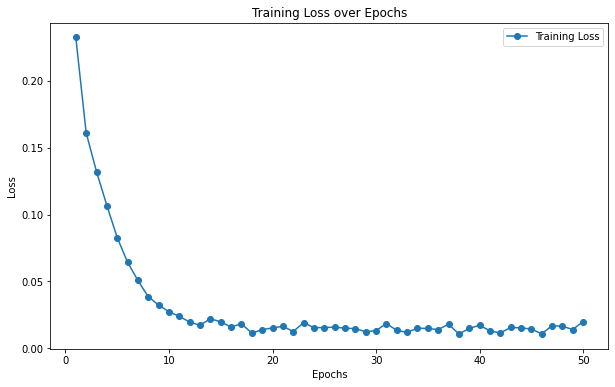

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

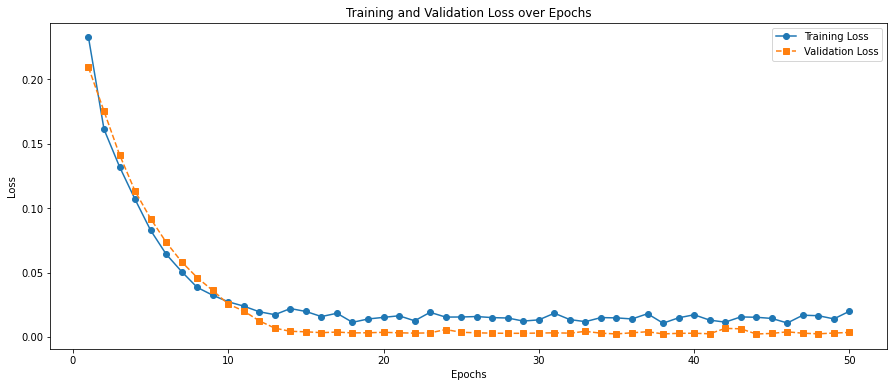

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model_LT3/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.06496040466597988
MAE : 0.054176387774927864


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        2.511223e+06    2347500.604
1        3.094428e+06    3151724.833
2        3.470270e+06    3719188.531
3        3.507984e+06    3636501.241
4        3.139131e+06    2526913.818
5        1.574585e+06    1128752.378
6        4.269311e+05     522831.371
7        1.486078e+05     346601.304
8        1.200507e+05     444914.605
9        6.640718e+05     827036.916
10       1.201768e+06    1142021.216
11       1.868919e+06    1885693.654
12       2.466754e+06    2542569.663
13       2.969091e+06    3107373.845
14       3.235854e+06    3488175.444
15       3.366805e+06    3746306.528
16       2.621359e+06    2942322.822
17       9.933486e+05    1507212.955
18       2.537547e+05     648507.437
19      -4.009048e+04     352564.010
20       1.693254e+05     453587.503
21       4.245457e+05     841043.793
22       1.229067e+06    1433155.266
23       1.692996e+06    2163687.646
24       2.515004e+06    2848863.133
25       3.137938e+06    3420877.229
26       3.459773e+06    3752886.938
27       3.579035e+06    3778951.818
28       2.894302e+06    2892177.223
29       1.286494e+06    1467610.428
30       4.454378e+05     377930.941
31       9.518768e+04     146440.376
32       2.505607e+05     244356.473
33       6.241092e+05     612217.566
34       1.402292e+06    1261627.075
35       2.049058e+06    1720565.225
36       2.694643e+06    2564005.541
37       3.412270e+06    2983773.529
38       3.662676e+06    3372645.223
39       3.776406e+06    3589687.043
40       2.962503e+06    2669385.189
41       1.441746e+06    1095398.946
42       4.543484e+05     319828.826
43       1.216109e+05     162541.182
44       1.586806e+05     179564.232
45       5.654747e+05     593196.107
46       1.212489e+06    1053508.835
47       1.855258e+06    1520776.003
48       2.507328e+06    2076164.165
49       3.073045e+06    2731799.027
50       3.401724e+06    3179384.692
51       3.425329e+06    3301335.210

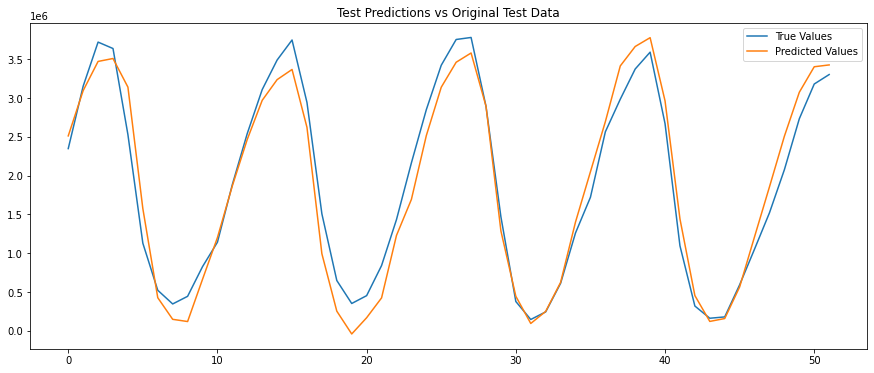

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

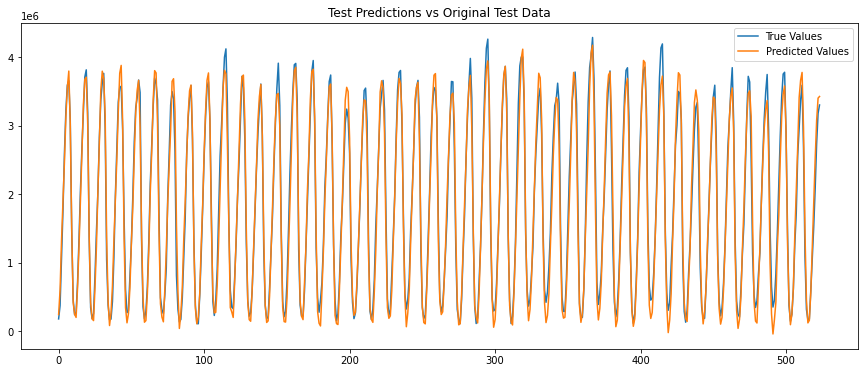

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()